In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [75]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Housing_Price_Data_Regression_Dataset.csv")

# 1. Data Inspection

In [76]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [7]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [8]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [77]:
categorical_cols =  df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(df[col].value_counts())

mainroad
yes    468
no      77
Name: count, dtype: int64
guestroom
no     448
yes     97
Name: count, dtype: int64
basement
no     354
yes    191
Name: count, dtype: int64
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
airconditioning
no     373
yes    172
Name: count, dtype: int64
prefarea
no     417
yes    128
Name: count, dtype: int64
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# 2. EDA

In [79]:
num_features = ['price','area', 'bedrooms', 'bathrooms', 'floors', 'parking']

*converting stories column to a meaningful name*

In [80]:
df.rename(columns={'stories': 'floors'}, inplace=True)

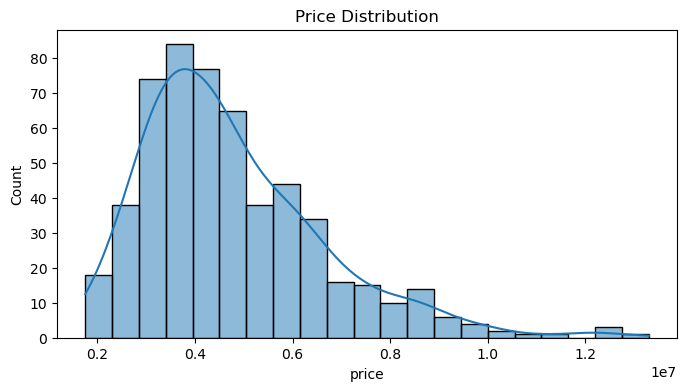

In [34]:
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

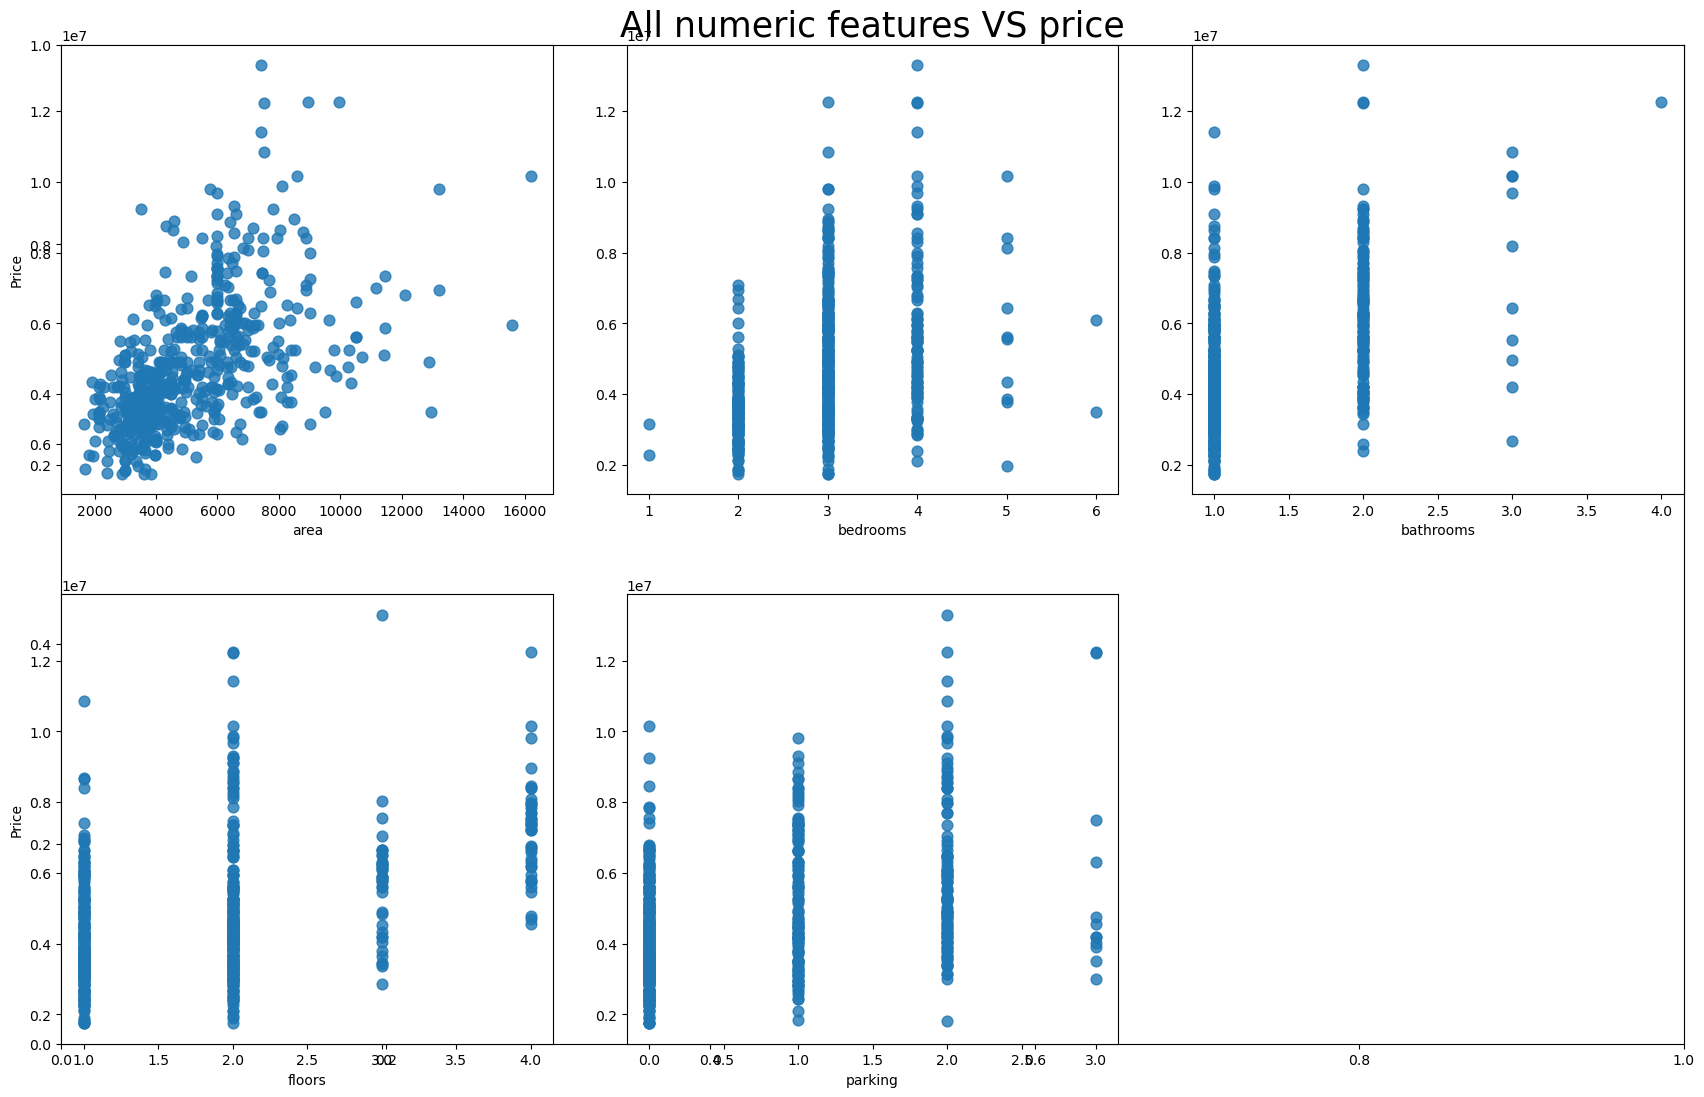

In [68]:
plt.figure(figsize=(18, 12))
plt.title('All numeric features VS price', fontsize=25)
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=feature, y='price', 
                data=df,
                fit_reg=False,  
                scatter_kws={'s': 60})
    plt.xlabel(feature)
    plt.ylabel('Price' if i in [1,4] else '')

plt.tight_layout(pad=3.0) 
plt.show()

*Area has a strong positive corealtion with Price*

<Figure size 1200x800 with 0 Axes>

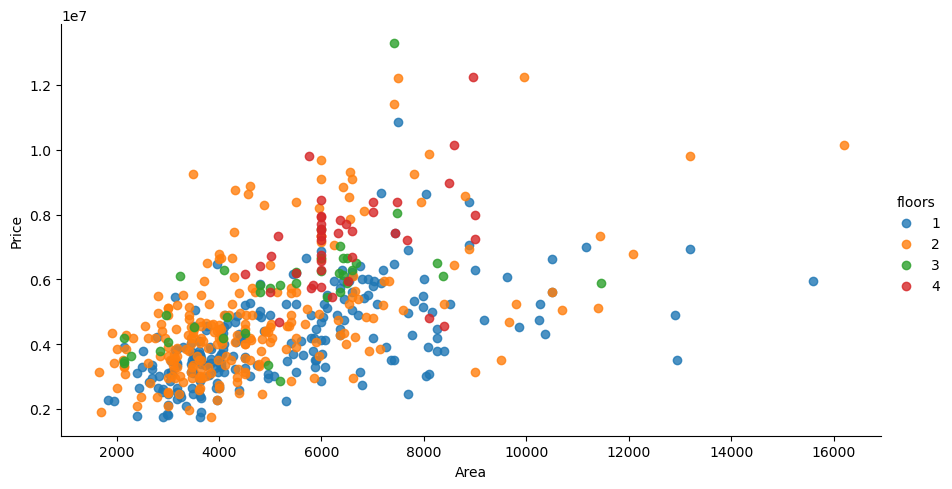

In [41]:
plt.figure(figsize = (12,8))
g=sns.lmplot(x="area", y="price", aspect=1.8,
                    data=df, hue="floors", fit_reg=False)
g.set_xlabels("Area")
g.set_ylabels("Price")
plt.show()

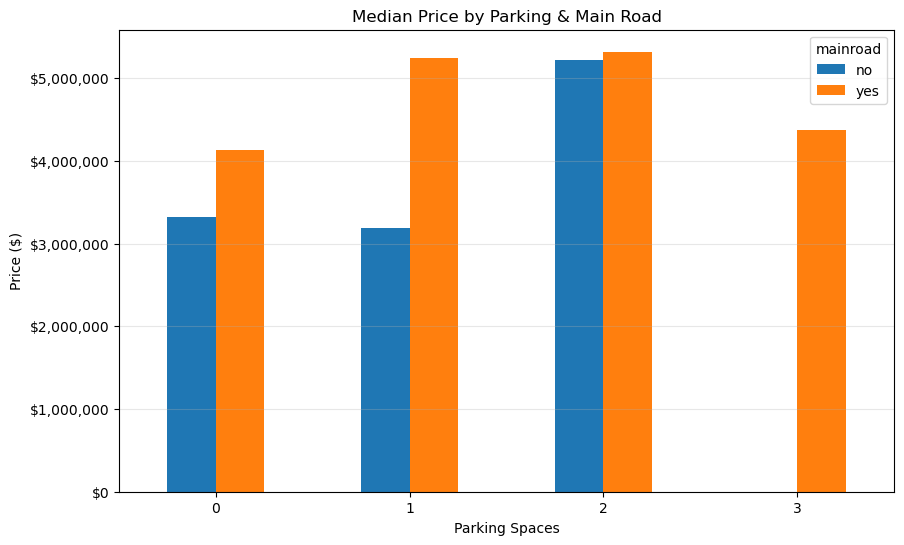

In [77]:
pd.crosstab(df['parking'], df['mainroad'], 
            values=df['price'], 
            aggfunc='median').plot(kind='bar', figsize=(10,6))
plt.title('Median Price by Parking & Main Road')
plt.ylabel('Price ($)')
plt.xlabel('Parking Spaces')
plt.xticks(rotation=0)
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))
plt.grid(axis='y', alpha=0.3)
plt.show()

* 2 parking spaces + main road show maximum price
* the only places have 3 parking spaces are those on the main road 

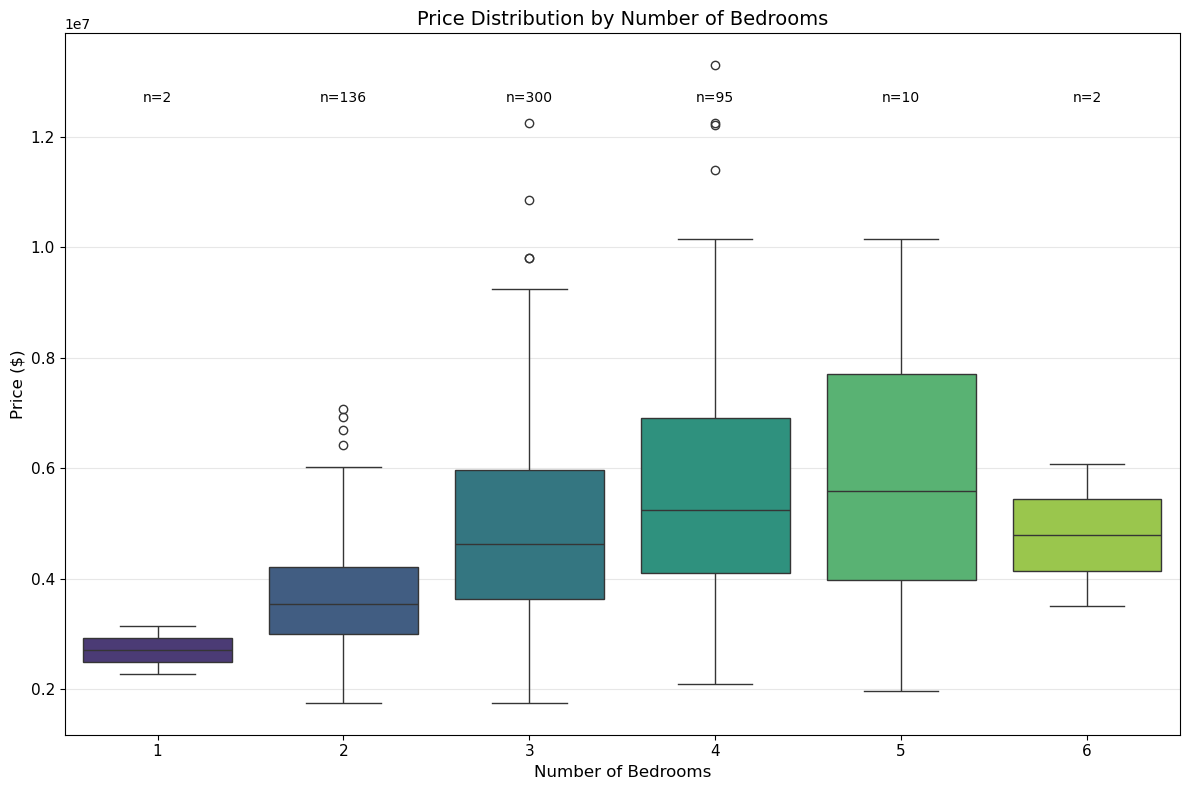

In [ ]:
plt.figure(figsize=(12, 8))

ax = sns.boxplot(x='bedrooms', y='price', data=df, 
                 order=sorted(df['bedrooms'].unique()),
                 palette='viridis')

bedroom_counts = df['bedrooms'].value_counts().sort_index()
for i, count in enumerate(bedroom_counts):
    ax.text(i, df['price'].max()*0.95, f'n={count}', 
            ha='center', fontsize=10, color='black')

plt.title('Price Distribution by Number of Bedrooms', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

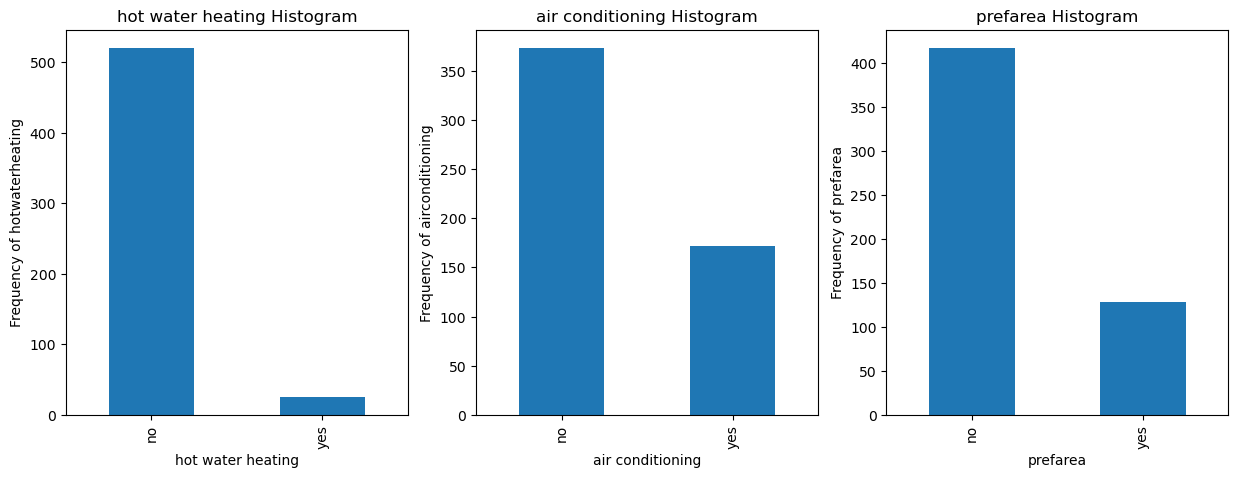

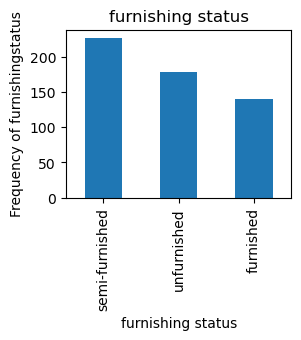

In [40]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt1 = df['hotwaterheating'].value_counts().plot(kind='bar')
plt.title('hot water heating Histogram')
plt1.set(xlabel = 'hot water heating', ylabel='Frequency of hotwaterheating')

plt.subplot(1, 3, 2)
plt1 = df['airconditioning'].value_counts().plot(kind='bar')
plt.title('air conditioning Histogram')
plt1.set(xlabel = 'air conditioning', ylabel='Frequency of airconditioning')

plt.subplot(1, 3, 3)
plt1 = df['prefarea'].value_counts().plot(kind='bar')
plt.title('prefarea Histogram')
plt1.set(xlabel = 'prefarea', ylabel='Frequency of prefarea')
plt.show()

plt.subplot(2, 2, 3)
plt1 = df['furnishingstatus'].value_counts().plot(kind='bar')
plt.title('furnishing status')
plt1.set(xlabel = 'furnishing status', ylabel='Frequency of furnishingstatus')
plt.show()

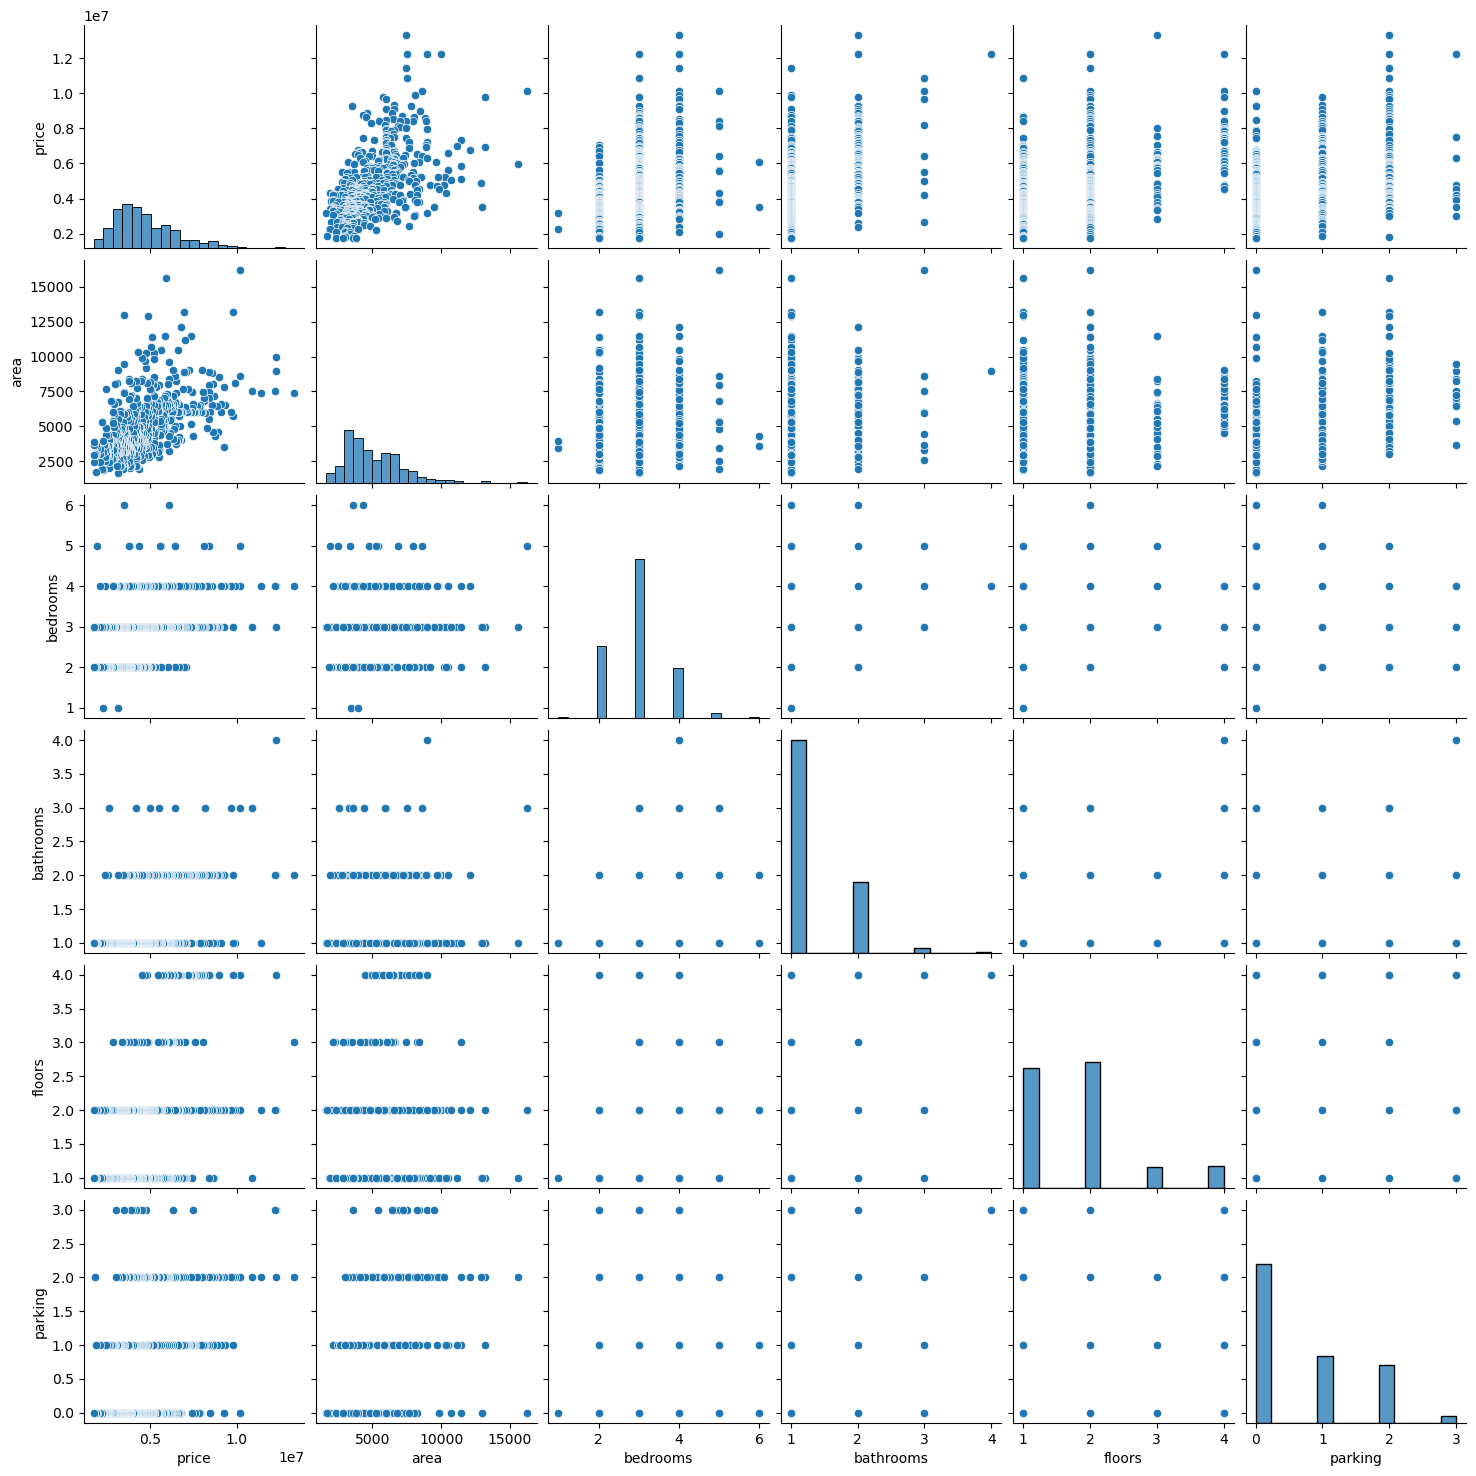

In [67]:
sns.pairplot(df)
plt.show()

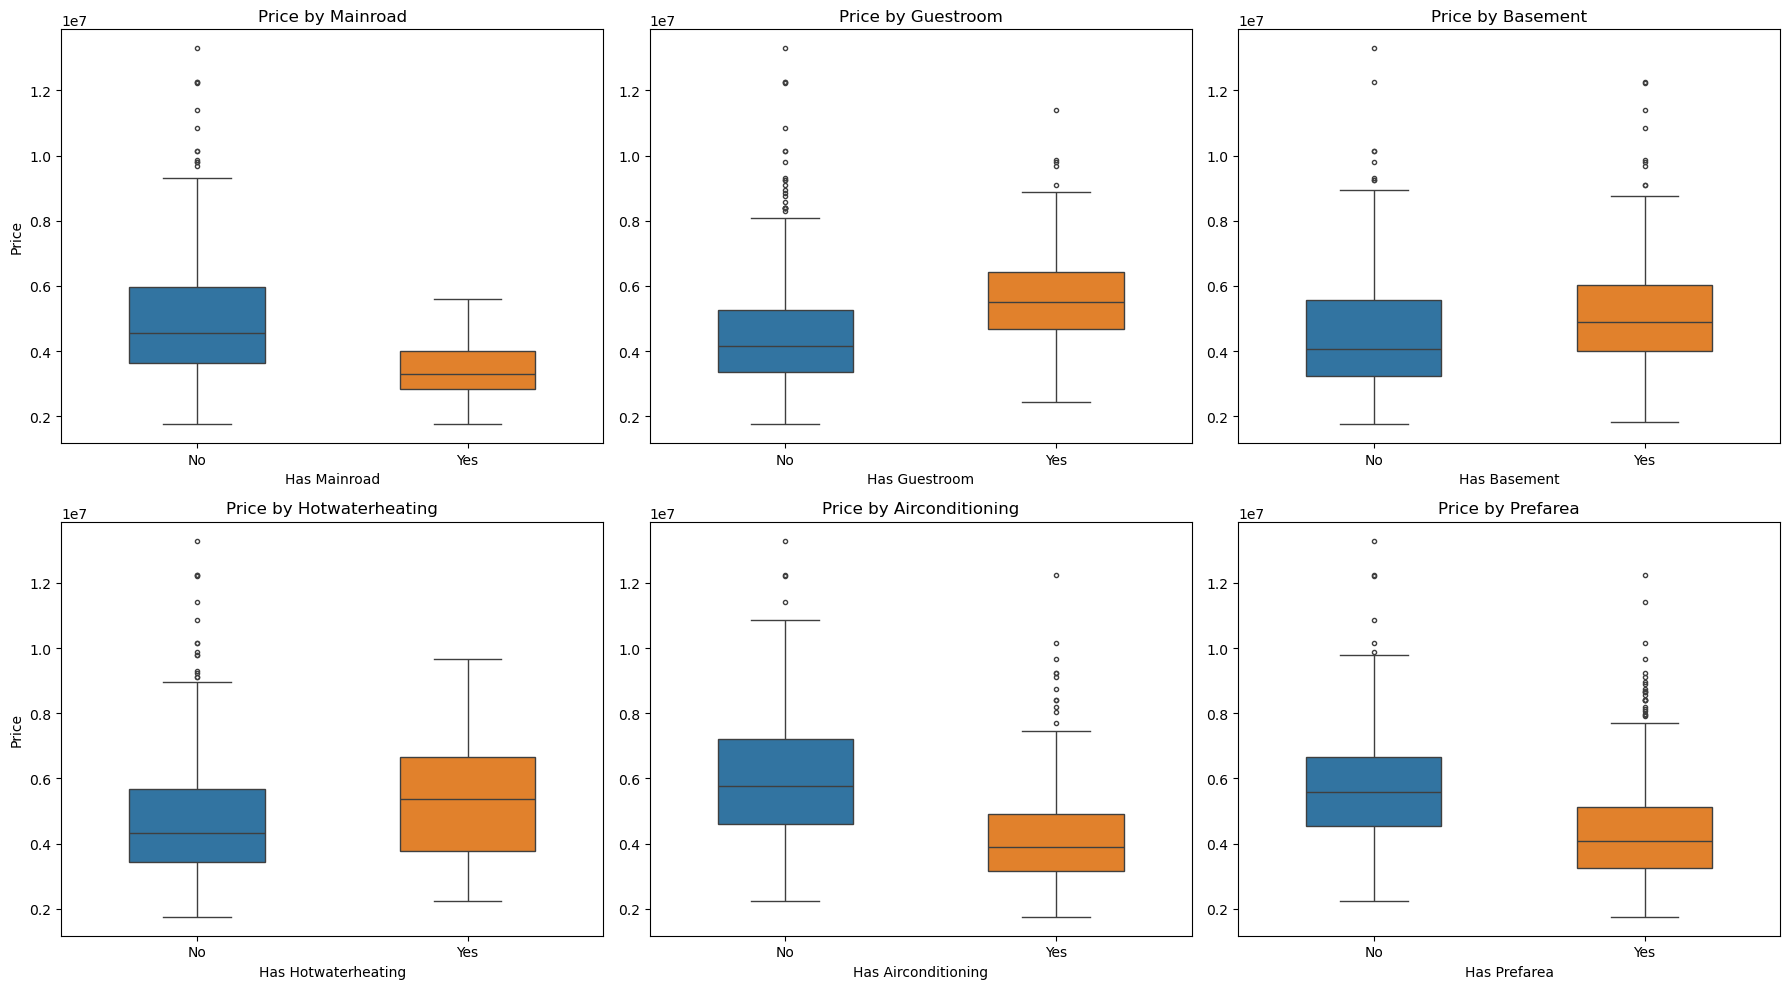

In [81]:
binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

plt.figure(figsize=(18, 10))

for i, feature in enumerate(binary_features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.boxplot(x=feature, y='price', 
                data=df,
                width=0.5,
                fliersize=3,
                palette=['#1f77b4', '#ff7f0e'])
    plt.title(f'Price by {feature.capitalize()}')
    plt.xlabel('Has ' + feature.capitalize())
    plt.ylabel('Price' if i in [1, 4] else '')
    plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

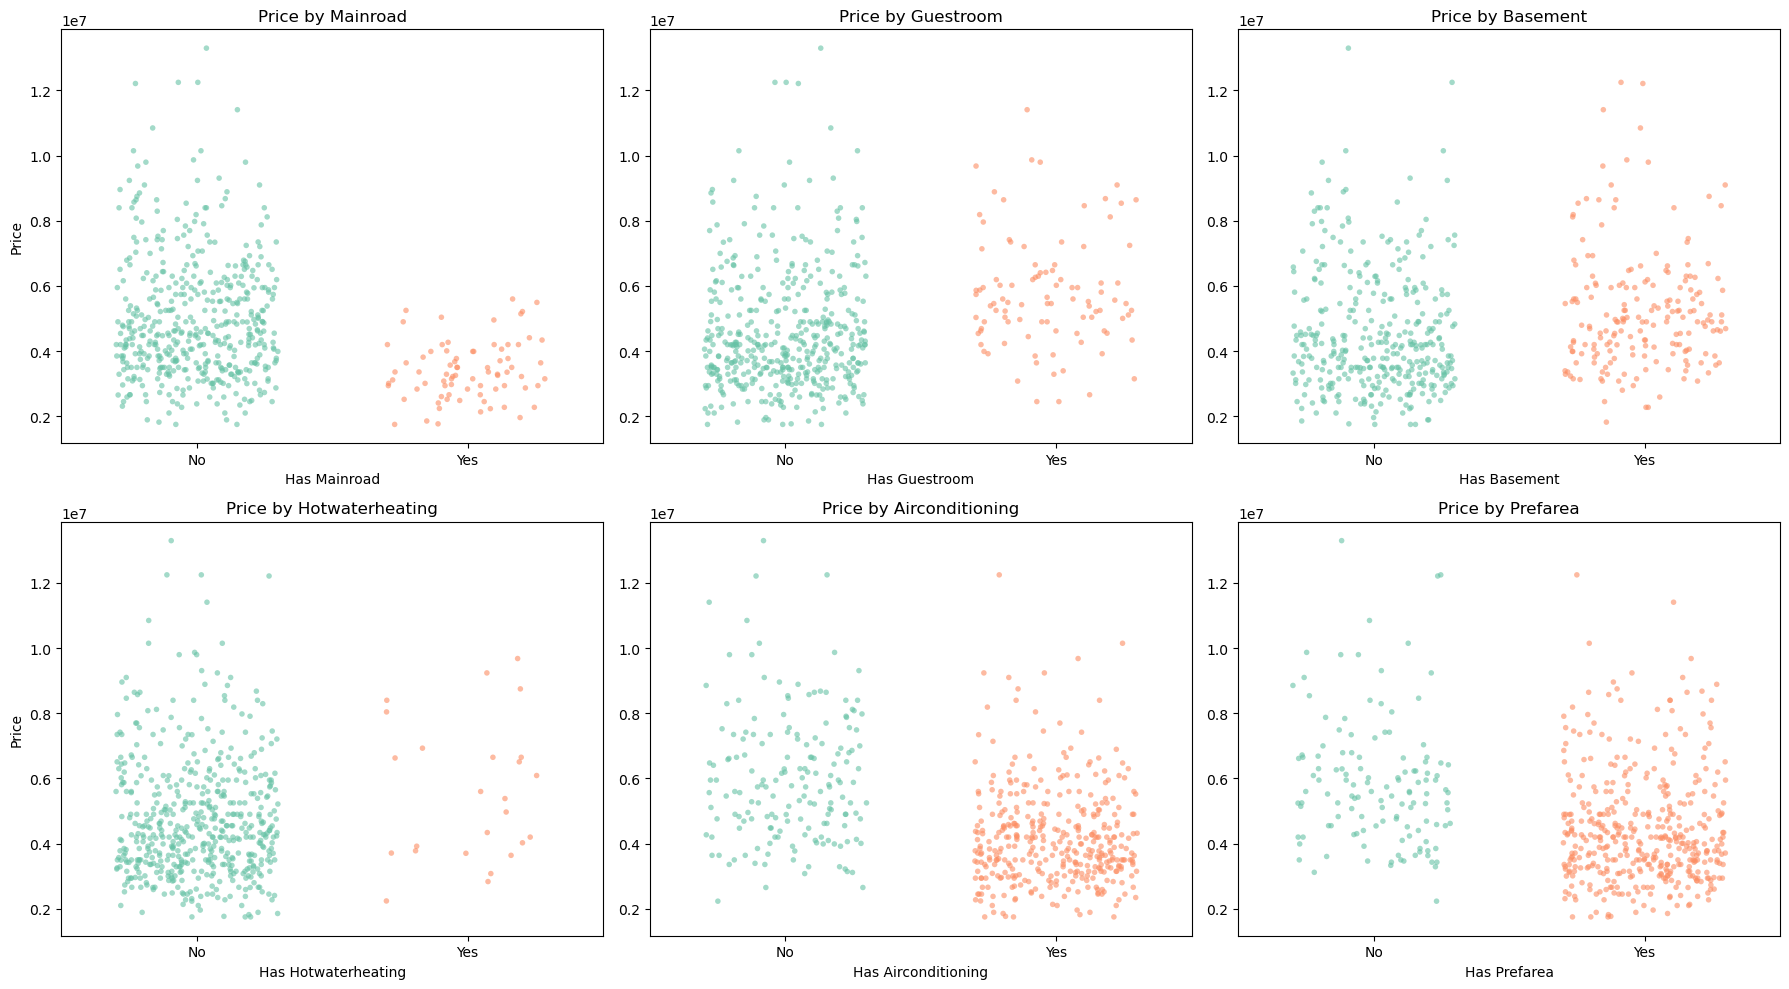

In [74]:
plt.figure(figsize=(18, 10))

for i, feature in enumerate(binary_features, 1):
    plt.subplot(2, 3, i)
    sns.stripplot(x=feature, y='price',
                  data=df,
                  jitter=0.3,
                  alpha=0.6,
                  size=4,
                  palette='Set2')
    plt.title(f'Price by {feature.capitalize()}')
    plt.xlabel('Has ' + feature.capitalize())
    plt.ylabel('Price' if i in [1, 4] else '')
    plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

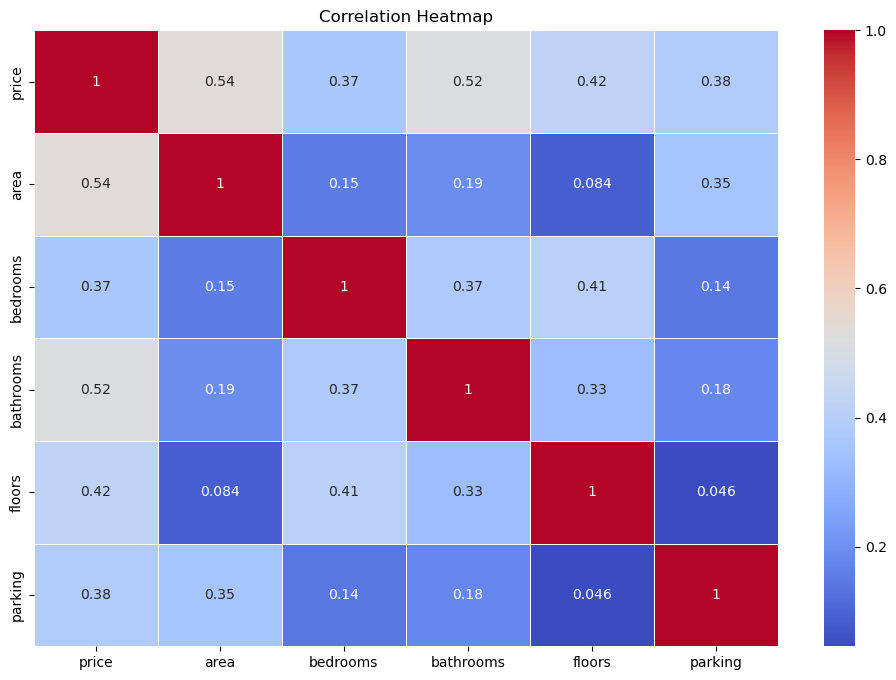

In [83]:
cor_matrix= df[num_features].corr()
plt.figure(figsize=(12, 8))  
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 3. Data cleaning & preprocessing 

*Detecting & handling outliers*

In [82]:
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_features] < (Q1 - 1.5*IQR)) | (df[num_features] > (Q3 + 1.5*IQR))).any(axis=1)
print(f"Found {outliers.sum()} potential outliers")

Found 82 potential outliers


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
floors,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


*Detecting outliers in more detailed steps, one col. at a time:*

In [17]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q1 + 1.5*IQR

lower_limit, upper_limit

(-540.0, 7740.0)

In [83]:
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q1 + 1.5*IQR

lower_limit, upper_limit


(0.5, 3.5)

In [84]:
Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q1 + 1.5*IQR

lower_limit, upper_limit

(-0.5, 2.5)

In [85]:
Q1 = df['floors'].quantile(0.25)
Q3 = df['floors'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q1 + 1.5*IQR

lower_limit, upper_limit

(-0.5, 2.5)

In [102]:
Q1 = df['parking'].quantile(0.25)
Q3 = df['parking'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q1 + 1.5*IQR

lower_limit, upper_limit

(-1.5, 1.5)

In [86]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q1 + 1.5*IQR

lower_limit, upper_limit

(-35000.0, 6895000.0)

*Capping outliers:*

In [87]:
caps = {
    'price':     {'min': 1_750_000, 'max': 6_895_000},
    'area':      {'min': 1_650,     'max': 7_750},
    'bedrooms':  {'min': 1,         'max': 4},
    'bathrooms': {'min': 1,         'max': 3},
    'floors':    {'min': 1,         'max': 3},
    'parking':   {'min': 0,         'max': 2}
}

for col in caps:
    df[col] = df[col].clip(
        lower=caps[col]['min'], 
        upper=caps[col]['max']
    )

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.568778e+06,1.432240e+06,1750000.0,3430000.0,4340000.0,5740000.0,6895000.0
area,545.0,4.948123e+03,1.689859e+03,1650.0,3600.0,4600.0,6360.0,7750.0
bedrooms,545.0,2.939450e+00,6.765530e-01,1.0,2.0,3.0,3.0,4.0
bathrooms,545.0,1.284404e+00,4.943010e-01,1.0,1.0,1.0,2.0,3.0
floors,545.0,1.730275e+00,7.010371e-01,1.0,1.0,2.0,2.0,3.0
parking,545.0,6.715596e-01,8.137255e-01,0.0,0.0,0.0,1.0,2.0


In [88]:
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_features] < (Q1 - 1.5*IQR)) | (df[num_features] > (Q3 + 1.5*IQR))).any(axis=1)
print(f"Found {outliers.sum()} potential outliers")

Found 0 potential outliers


# feature engineering

In [ ]:
df['price_per_sqft'] = df['price'] / df['area']
df['room_ratio'] = df['bedrooms'] / df['bathrooms'].replace(0, 0.1)  # Avoid division by zero
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

***Binary Encoding for the binary features***

In [90]:
df[binary_features] = df[binary_features].replace({'yes': 1, 'no': 0})

***Ordinal Encoding for furnishingstatus as it has natrual order***
* unfurnished -> 0
* semi-furnisher -> 1
* furnisher -> 2

In [91]:
order_map = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df['furnishing_encoded'] = df['furnishingstatus'].map(order_map)

In [92]:
df.drop('furnishingstatus', axis=1, inplace=True)

In [94]:
df

,price,area,bedrooms,bathrooms,floors,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price_per_sqft,room_ratio,total_rooms,furnishing_encoded
0,6895000,7420,4,2,3,1,0,0,0,1,2,1,929.245283,2.000000,6,2
1,6895000,7750,4,3,3,1,0,0,0,1,2,0,889.677419,1.333333,7,2
2,6895000,7750,3,2,2,1,0,1,0,0,2,1,889.677419,1.500000,5,1
3,6895000,7500,4,2,2,1,0,1,0,1,2,1,919.333333,2.000000,6,2
4,6895000,7420,4,1,2,1,1,1,0,1,2,0,929.245283,4.000000,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,606.666667,2.000000,3,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,736.312500,3.000000,4,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,483.425414,2.000000,3,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,601.374570,3.000000,4,2


# 4. Building the model

*Data splitting*

In [93]:
X = df.drop("price", axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Data scalling*

In [95]:
num_cols = ['area', 'bedrooms', 'bathrooms', 'floors', 'parking', 'price_per_sqft', 'room_ratio', 'total_rooms']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

1. linear regression

In [96]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred_lr = reg.predict(X_test)
print("\nLinear Regression")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression
MSE: 234952831412.3505
MAE: 360171.74668823875
R2 Score: 0.9110380227182975


In [98]:
params = {'alpha': [0.01, 0.1, 1, 10]}  # Regularization strength
grid = GridSearchCV(Ridge(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print(f"Best alpha: {grid.best_params_}")

Best alpha: {'alpha': 10}


2. Ridge

In [99]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [100]:
y_pred = ridge_model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred):.2f}")

Test MSE: 235607857929.83
Test R²: 0.91


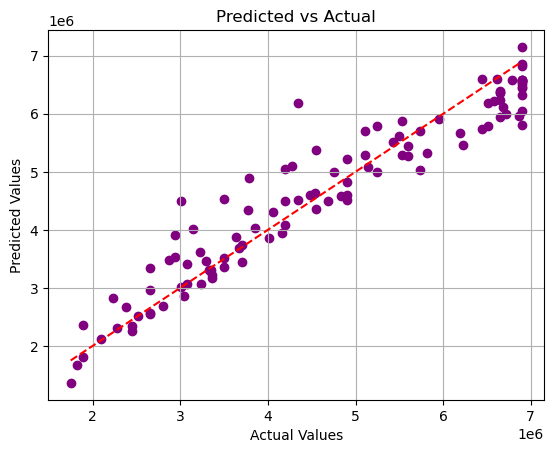

In [101]:
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect fit line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.grid(True)
plt.show()

3. lasso

In [102]:
lasso = Lasso(max_iter=10000)
lasso_params = {
    'alpha': [0.01, 0.1, 1.0]
}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.218e+13, tolerance: 8.260e+10
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.0]}, scoring='r2')

In [103]:
print("\nLasso Regression Best Params:", lasso_grid.best_params_)


Lasso Regression Best Params: {'alpha': 1.0}


In [104]:
y_pred_lasso = lasso_grid.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))

MSE: 234954670578.50427
MAE: 360173.4811940248
R2 Score: 0.9110373263408306


4. decision tree regressor

In [105]:
dt = DecisionTreeRegressor()
dt_params = {
    'max_depth': [3, 5, 10],
    'criterion': ['squared_error', 'absolute_error']
}
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='r2', n_jobs=-1)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 10]},
             scoring='r2')

In [106]:
print("\nDecision Tree Regressor Best Params:", dt_grid.best_params_)



Decision Tree Regressor Best Params: {'criterion': 'squared_error', 'max_depth': 10}


In [107]:
y_pred_dt = dt_grid.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))

MSE: 150282298068.29767
MAE: 249411.31498470946
R2 Score: 0.943097470644522


5. random forest regressor

In [108]:
rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [109]:
print("\nRandom Forest Regressor Best Params:", rf_grid.best_params_)



Random Forest Regressor Best Params: {'max_depth': 10, 'n_estimators': 200}


In [110]:
y_pred_rf = rf_grid.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

MSE: 69227163192.8008
MAE: 187007.81207967392
R2 Score: 0.9737879927549112


6. Gradient Boosting Regressor

In [111]:
gb = GradientBoostingRegressor()
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [112]:
print("\nGradient Boosting Regressor Best Params:", gb_grid.best_params_)



Gradient Boosting Regressor Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [113]:
y_pred_gb = gb_grid.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R2 Score:", r2_score(y_test, y_pred_gb))

MSE: 44477035247.72452
MAE: 142767.27039996505
R2 Score: 0.983159321913762


7. KNN

In [115]:
knn = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='r2', n_jobs=-1)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [116]:
print("\nKNN Regressor Best Params:", knn_grid.best_params_)


KNN Regressor Best Params: {'n_neighbors': 3, 'weights': 'distance'}


In [117]:
y_pred_knn = knn_grid.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_knn))
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("R2 Score:", r2_score(y_test, y_pred_knn))

MSE: 49389286408.04185
MAE: 136339.80295986228
R2 Score: 0.9812993589011894
